In [119]:
import pandas as pnd

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
import numpy as np

In [120]:
#inits
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

In [121]:
automationLogs = pnd.read_csv('//Failure_Analysis.csv')

//anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,2

In [122]:
#automationLogsFiltered=automationLogs[features]
#print("shape is {} and count is {}".format(automationLogsFiltered.shape,automationLogsFiltered.size))
#del automationLogs
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')
df2 = pnd.DataFrame(np.array([pnd.factorize(automationLogs['ERROR'])[0],
                              pnd.factorize(automationLogs['Analysis'])[0]]).transpose(),
                   columns=['ERROR','Analysis'])
#df3 = pnd.df2(np.random.rand(10, 4), columns=['Platform','ERROR'])



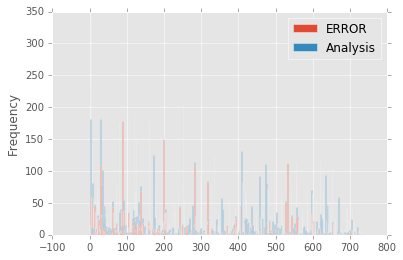

In [123]:
#print df2
#print automationLogs[['ERROR','Analysis']].head(11)
#print "",df2
#print "",df2[1]
#Mybar = df2[1:200].plot.bar()
import matplotlib.pyplot as plt
MyHist = df2.plot.hist(stacked=True, bins=700)
#plt.savefig("graph.png", dpi=500)

In [124]:
#import seaborn as sns
#sns.

In [125]:
feature1=['ERROR']
feature2=['Platform']
output = ['Analysis']
features = feature1 + feature2 + output
features

automationLogsFiltered=automationLogs[features]
print("shape is {} and count is {}".format(automationLogsFiltered.shape,automationLogsFiltered.size))
#del automationLogs

shape is (6968, 3) and count is 20904


In [126]:
automationLogsFiltered=automationLogsFiltered[pnd.isnull(automationLogsFiltered['ERROR']) == False]
automationLogsFiltered=automationLogsFiltered[pnd.isnull(automationLogsFiltered['Platform']) == False]
automationLogsFiltered["finalFeature"] = automationLogsFiltered["Platform"].map(str)  + "::" + automationLogsFiltered["ERROR"]
automationLogsFiltered.reset_index(drop=True,inplace=True)

In [127]:
automationLogsFiltered.head(10)

,ERROR,Platform,Analysis,finalFeature
0,USER_ABORTED: User aborted,Comhem,WARN: Failed to get dynamic hostname!,Comhem::USER_ABORTED: User aborted
1,0. FAILED - Menu list is incorrect,Comhem,Bug 401935 - Automation:ODC:TC-118009 failed t...,Comhem:: 0. FAILED - Menu list is incorrect
2,0. FAILED - ****Unable to verify Fleeting Icon...,Comhem,Script has taken screendump after program was ...,Comhem::0. FAILED - ****Unable to verify Fleet...
3,0. ABORT - Episodic Program Information not de...,Comhem,Bug 401592 - Automation:ODC:TC-109360 and 1093...,Comhem::0. ABORT - Episodic Program Informatio...
4,0. ABORT - Movie Program Information !defined,Comhem,Bug 401592 - Automation:ODC:TC-109360 and 1093...,Comhem::0. ABORT - Movie Program Information !...
5,0. ABORT - Could not reach To Do list,Comhem,Bug 401841 - Automation:ODC:environment.xsl an...,Comhem:: 0. ABORT - Could not reach To Do list
6,0. ABORT - Failed to go to Central screen,Comhem,Changes not pushed to production,Comhem::0. ABORT - Failed to go to Central scr...
7,0. FAILED - RW speed 1 not verified,Comhem,Reverse key played BONK sound.\nProbably there...,Comhem::0. FAILED - RW speed 1 not verified
8,0. FAILED - FW speed 1 not verified,Pace,Bug 393378 - Automation:ODC:Pace Auto-BRAT fai...,Pace::0. FAILED - FW speed 1 not verified
9,0. FAILED - RW speed 1 not verified,Pace,Bug 393378 - Automation:ODC:Pace Auto-BRAT fai...,Pace::0. FAILED - RW speed 1 not verified


In [128]:
#automationLogsRemovedDuplicates.head(30)

In [129]:
uniqueErrors = automationLogsFiltered['finalFeature'].unique().tolist()

print (automationLogsFiltered.columns)
automationLogsRemovedDuplicates = pnd.DataFrame(columns=automationLogsFiltered.columns)
tempList = []
print (type(tempList))
print (automationLogsRemovedDuplicates.shape)
print (automationLogsFiltered.shape)
print ("uniqueErrors[1:4]{} \n".format(uniqueErrors[1:3]))
for i in (uniqueErrors):
    #print "UniqueError:{}\n".format(i)
    #print automationLogsFiltered[automationLogsFiltered['Analysis'].isin(automationLogsFiltered[automationLogsFiltered['ERROR'] == i]['Analysis'].unique())]
    #print automationLogsFiltered[automationLogsFiltered['ERROR'] == i]['Analysis'].unique()
    AnalysisForUniqueError = automationLogsFiltered[automationLogsFiltered['finalFeature'] == i]['Analysis']
    AnalysisForUniqueErrorLastIndexes = AnalysisForUniqueError[automationLogsFiltered['Analysis'] == AnalysisForUniqueError.unique().tolist()[-1]].index.tolist()
    tempList = tempList + AnalysisForUniqueErrorLastIndexes
    ##uniqueErrorAnalysisPairs = automationLogsFiltered[AnalysisForUniqueErrorLastIndexes]
        #uniqueErrorAnalysisPairs = automationLogsFiltered[AnalysisForUniqueError[AnalysisForUniqueError.unique().tolist()[-1]]
    #print "=====ITERATION==="
    #print (AnalysisForUniqueError[automationLogsFiltered['Analysis'] == AnalysisForUniqueError.unique().tolist()[-1]].index.tolist())

    #print (uniqueErrorAnalysisPairs)
    ##automationLogsRemovedDuplicates = automationLogsRemovedDuplicates.append(uniqueErrorAnalysisPairs)
    #print automationLogsRemovedDuplicates
#automationLogsRemovedDuplicates = pnd.concat(automationLogsRemovedDuplicates, axis=1) 
#for i in tempList:
#    automationLogsRemovedDuplicates = automationLogsRemovedDuplicates.append(automationLogsFiltered.iloc[i])

Index(['ERROR', 'Platform', 'Analysis', 'finalFeature'], dtype='object')
<class 'list'>
(0, 4)
(6947, 4)
uniqueErrors[1:4]['Comhem:: 0. FAILED - Menu list is incorrect ', 'Comhem::0. FAILED - ****Unable to verify Fleeting Icon**** \xa0'] 



In [130]:
#print len(automationLogsRemovedDuplicates)

print (tempList[1:22])
lenTempList = len(tempList)
print (lenTempList)
#print [automationLogsFiltered.iloc[i]  for i in tempList]
#for i in tempList[1:10]:
    #print pnd.DataFrame(automationLogsFiltered.iloc[i])

automationLogsFiltered = automationLogsFiltered.iloc[tempList,]
#print type(automationLogsRemovedDuplicates)
#automationLogsFiltered.iloc[tempList[1:22],]
print (len(automationLogsFiltered))
automationLogsFiltered.reset_index(drop=True,inplace=True)

[1, 50, 5271, 3147, 3184, 6435, 6463, 6498, 6537, 6557, 6562, 6577, 6595, 6606, 6607, 6635, 6666, 6695, 6709, 6718, 6728]
3993
3993


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfModel = TfidfVectorizer(min_df=1,tokenizer=None,ngram_range=(1,4))
X = tfidfModel.fit_transform(automationLogsFiltered['finalFeature'])

In [132]:
print (len(automationLogsFiltered))
print (X.shape)
#print X[5927]

3993
(3993, 7574)


In [133]:
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, automationLogsFiltered['Analysis'], test_size=0.20, random_state=42)


#X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    pnd.factorize(automationLogsFiltered['Analysis'])[0], 
                                                    test_size=0.20, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [134]:
from sklearn.svm import SVC
import numpy as np
C_range = np.logspace(0,2,20)

In [135]:
from sklearn import svm
from sklearn.metrics import (accuracy_score,f1_score)

maxAccuracy=0
bestCV=0
for c in C_range:
    clf = svm.SVC(C=c,kernel='linear',decision_function_shape ='ovr' )
    clf.fit(X_train, y_train)  
    svmPredictions = clf.predict(X_validation)
    currentAccuracy = accuracy_score(y_validation,svmPredictions)
    if currentAccuracy > maxAccuracy:
        maxAccuracy = currentAccuracy
        bestCV = c
    print (currentAccuracy,c)
    #f1_score(y_validation,svmPredictions)
print ("BestAccuracy:{} bestCV{}".format(maxAccuracy,bestCV))

0.679197994987 1.0
0.709273182957 1.2742749857
0.714285714286 1.62377673919
0.721804511278 2.06913808111
0.731829573935 2.63665089873
0.739348370927 3.35981828628
0.744360902256 4.28133239872
0.749373433584 5.45559478117
0.74686716792 6.95192796178
0.74686716792 8.8586679041
0.744360902256 11.2883789168
0.744360902256 14.3844988829
0.74686716792 18.3298071083
0.74686716792 23.3572146909
0.74686716792 29.7635144163
0.74686716792 37.9269019073
0.74686716792 48.3293023857
0.74686716792 61.5848211066
0.74686716792 78.4759970351
0.74686716792 100.0
BestAccuracy:0.7493734335839599 bestCV5.455594781168519


In [41]:
'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import grid_search
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear'], 'C': np.logspace(-2,3,10)}]
score = 'accuracy'
clf = grid_search.GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                   scoring=score)
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(accuracy_score(y_true, y_pred))
print()
'''

'\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.metrics import f1_score\nfrom sklearn import grid_search\n# Set the parameters by cross-validation\ntuned_parameters = [{\'kernel\': [\'linear\'], \'C\': np.logspace(-2,3,10)}]\nscore = \'accuracy\'\nclf = grid_search.GridSearchCV(SVC(C=1), tuned_parameters, cv=5,\n                   scoring=score)\nclf.fit(X_train, y_train)\nprint("Best parameters set found on development set:")\nprint()\nprint(clf.best_params_)\nprint()\nprint("Grid scores on development set:")\nprint()\nfor params, mean_score, scores in clf.grid_scores_:\n    print("%0.3f (+/-%0.03f) for %r"\n              % (mean_score, scores.std() * 2, params))\nprint()\n\nprint("Detailed classification report:")\nprint()\nprint("The model is trained on the full development set.")\nprint("The scores are computed on the full evaluation set.")\nprint()\ny_true, y_pred = y_test, clf.predict(X_test)\nprint(accuracy_score(y_true, y_pred))\nprint()\n'

In [174]:
from sklearn.svm import SVC

#clf = SVC(C=bestCV)
#clf.fit(X_train,y_train)
#TODO: remove later hard coded best CV temp
#bestCV = 5.45559478117
clf = svm.SVC(C=bestCV,kernel='linear',decision_function_shape ='ovr',probability=True )
clf.fit(X_train, y_train)  
svmPredictions = clf.predict(X_validation)
currentAccuracy = accuracy_score(y_validation,svmPredictions)

In [175]:
print (clf.predict_proba(X_validation).shape)
print (accuracy_score(y_test,clf.predict(X_test)), f1_score(y_test,clf.predict(X_test)))

(399, 495)
0.7375 0.713766898407


//anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
//anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [209]:
#automationLogsFiltered_temp = pnd.DataFrame(columns=automationLogsFiltered.columns)
def giveMyPrediction(product,myerror):
    #print (automationLogsFiltered.shape[0])
    string= product + "::" + myerror
    #automationLogsFiltered_temp.loc[automationLogsFiltered_temp.shape[0]]['finalFeature'] = string
    newframe = pnd.DataFrame([[myerror,product,"",string]],
                             columns=automationLogsFiltered.columns)
    #print (type(newframe))
    #print (automationLogsFiltered.columns)
    automationLogsFiltered_temp = pnd.concat([automationLogsFiltered, newframe])
                                                           #[{'ERROR':myerror, "Platform": product, "Analysis": "", 'finalFeature':string}]
    tfidfModel = TfidfVectorizer(min_df=1,tokenizer=None,ngram_range=(1,4))
    automationLogsFiltered_temp.reset_index(drop=True,inplace=True)
    #print(pnd.isnull(automationLogsFiltered_temp['finalFeature']))
    #print(automationLogsFiltered_temp)
    X = tfidfModel.fit_transform(automationLogsFiltered_temp['finalFeature'])
    
    clf = svm.SVC(C=bestCV,kernel='linear',decision_function_shape ='ovr',probability=True )
    clf.fit(X[1:automationLogsFiltered.shape[0]], pnd.factorize(automationLogsFiltered_temp['Analysis'][1:automationLogsFiltered.shape[0]])[0])  
    #svmPredictions = clf.predict(X.A[3993])
    #currentAccuracy = accuracy_score(y_validation,svmPredictions)
    
    #print (X.shape)
    index = automationLogsFiltered_temp.shape[0] -1
    hotencoded = clf.predict(X.A[index])
    print (pnd.factorize(automationLogsFiltered_temp['Analysis'])[1][hotencoded])
    print (automationLogsFiltered_temp.shape[0])
    #print (X[3992])

#giveMyPrediction("Picaso","0. ABORT - Unable to create recording on channel 121")
giveMyPrediction("SmartBox","0. FAILED - ****Unable to highlight Showcases****")
#print (pnd.factorize(automationLogsFiltered['Analysis'])[1][3991])
#print (X.shape[0],X[1:automationLogsFiltered.shape[0]])

Index(['Bug 425689 - Automation:ODC:TC-121049: "SHOWCASESANDEXTRAS" constant has to be defined EncoreSmartbox file'], dtype='object')
3994


//anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [42]:
from sklearn.metrics import accuracy_score
svmPredictions = clf.predict(X_test)
accuracy_score(y_test,svmPredictions)
svmProbPredictions = clf.predict_proba(X_test)

In [43]:
import operator

for i in range(100):
    values=svmProbPredictions[i]
    #min_index, min_value = min(enumerate(values), key=operator.itemgetter(1))
    max_index, max_value = max(enumerate(values), key=operator.itemgetter(1))
    print("highest_prob_index: {} max_prob: {}, prediction: {},real: {}".format(max_index,max_value,svmPredictions[i],y_test[i]))

highest_prob_index: 436 max_prob: 0.04528397639853348, prediction: 467,real: 467
highest_prob_index: 420 max_prob: 0.06180724027401956, prediction: 451,real: 451
highest_prob_index: 70 max_prob: 0.21773725672729413, prediction: 72,real: 72
highest_prob_index: 9 max_prob: 0.09991641418845391, prediction: 9,real: 9
highest_prob_index: 183 max_prob: 0.037121542194447174, prediction: 131,real: 131
highest_prob_index: 43 max_prob: 0.10347973206538476, prediction: 45,real: 45
highest_prob_index: 11 max_prob: 0.09058970087322554, prediction: 48,real: 11
highest_prob_index: 166 max_prob: 0.05511081881883841, prediction: 176,real: 71
highest_prob_index: 453 max_prob: 0.031960452704030945, prediction: 486,real: 486
highest_prob_index: 272 max_prob: 0.031113236157862663, prediction: 292,real: 292
highest_prob_index: 61 max_prob: 0.03012031593267678, prediction: 155,real: 323
highest_prob_index: 320 max_prob: 0.18305457480544232, prediction: 345,real: 345
highest_prob_index: 320 max_prob: 0.035342

In [54]:
def getUpperAndLowerQuartile(data):
    q75, q25 = np.percentile(data, [75 ,25])
    return q75,q25

def getUpperAndLowerOutlierThreshold(data):
    q75, q25 = getUpperAndLowerQuartile(data)
    iqr = q75 - q25
    upperOutlier = q75 + iqr*1.5
    lowerOutlier = q25 - iqr*1.5
    return upperOutlier,lowerOutlier

In [56]:
upperOutlier,lowerOutlier = getUpperAndLowerOutlierThreshold(svmProbPredictions)
q75,q25 = getUpperAndLowerQuartile(svmProbPredictions)

In [58]:
print (np.min(svmProbPredictions),np.max(svmProbPredictions))
print (upperOutlier,lowerOutlier)
print (q75,q25)

0.00021697852937 0.461086497197
0.00320784050248 -0.000950604580726
0.00164842359628 0.000608812325476


In [59]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,svmPredictions)

confusion_matrix_frame = pnd.DataFrame(conf_mat)

In [62]:
print ("Here is list of number of correct predictions with in test data\n{}".format(conf_mat.diagonal()))
print ("+"*80)
print ("Total values for prediction were:",y_test.shape[0])
print ("Total values correctly predicted are:",sum(conf_mat.diagonal()))
print ("+"*80)

Here is list of number of correct predictions with in test data
[ 1  3  4 12  3  1  1  2  2  9  1  1  1  1  0  3  0  0  1  2  7  0  3  2  4
  7  1  0  1  0  0  0  5  0  0  2  0  0  4  1 11  1  1  0  3  0  5  1  3  0
  0  1  5  0  5  0  1  1  0  7  0  0  1  0  2  0  2  1  0  1  0  1  3  0  0
  0  5  0  1  0  0  1  0  1  4  1  0  1  1  0  2  1  0  0  1  0  0  0  0  3
  2  0  0  0  0  1  2  0  0  1  1  0  1  0  0  1  6  5  0  0  2  1  0  0  3
  0  0  4  1  5  4  1  1  0  0  1  0  0  0  4  1 13  0  0  0  2  1  0  8 11
  3  0  1  1  0  1  0  0  0  4  0  1  0  1  0  1  0  3  2  6  1  3  2  1  3
  1  0  2  1  0  0  0  0  3  7  1  0  0  0  0  0  0  0  0  0  0]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total values for prediction were: 400
Total values correctly predicted are: 295
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [76]:
#saveBack = pnd.DataFrame({'ERROR':X_test, 'true Analysis': y_test, 'Predicted Analysis': svmPredictions})
#saveBack = pnd.DataFrame({'true Analysis': y_test, 'Predicted Analysis': svmPredictions})

In [117]:
print (len(saveBack[saveBack['Predicted Analysis'] == saveBack['true Analysis']]))
#print (saveBack)
y_test_value= []
svmPrediction_value = []
a = pnd.factorize(automationLogsFiltered['Analysis'])
print (max(a[0]))
print (type(y_test))
print (a[1][535])#map(lambda x: 
print (len(y_test),len(svmPredictions))
for i in y_test:
    #for index,value in enumerate(a[0]):
        #if i == value:
    y_test_value.append(a[1][i])

for i in svmPredictions:
    svmPrediction_value.append(a[1][i])

print (len(y_test_value),len(svmPrediction_value))
saveBack = pnd.DataFrame({'true Analysis': y_test_value, 'Predicted Analysis': svmPrediction_value})

295
535
<class 'numpy.ndarray'>
Delay in printing Q_screenname.
400 400
400 400


In [118]:
print (len(saveBack))
saveBack.to_csv("Predicted.csv")

400


In [59]:
svmExtraPredictions = clf.predict(X_train)
trainpredict = pnd.DataFrame({'true Output': y_train, 'Predicted output': svmExtraPredictions})
print len(trainpredict[trainpredict['Predicted output'] == trainpredict['true Output']])
print len(trainpredict)

3769
5557


In [60]:
accuracy_score(y_train,svmExtraPredictions)

//anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:177: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  score = y_true == y_pred


0.67842360986143602

In [18]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import pandas as pnd

def mytokenizer(x):
    raw = x.lower()
    tokens = tokenizer.tokenize(raw)
    return tokens
    #print tokens
    

#texts = [automationLogsFiltered['finalFeature'][1:5].apply(lambda x: mytokenizer(x))]
 
texts = [mytokenizer(text) for text in automationLogsFiltered['finalFeature']]
#print (texts)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [19]:
import sys
import os
LDA_CORPUS_SIZE=len(automationLogsFiltered)
#LDA_CORPUS_SIZE=2000

In [50]:

a= os.times()[4]

dldamodel = gensim.models.ldamodel.LdaModel(corpus[1:LDA_CORPUS_SIZE], 
                                            num_topics=max(pnd.factorize(automationLogsFiltered['Analysis'][1:LDA_CORPUS_SIZE])[0]) + 1
                                            , id2word = dictionary, passes=2000)
print os.times()[4] -a  

38548.59


In [21]:
'''
import joblib
import os
if not os.path.exists("models/ldamodelPOC.pkl"):
     joblib.dump(dldamodel, "models/ldamodelPOC.pkl")
else:
    dldamodel = joblib.load('models/ldamodelPOC.pkl') 
'''
#joblib.dump(dldamodel, "models/ldamodelPOC.pkl")
import joblib
dldamodel = joblib.load('models/ldamodelPOC.pkl')

In [54]:
# dldamodel = joblib.load('models/ldamodelPOC.pkl') 

In [22]:
from gensim import matutils 
print dldamodel.num_topics
print dldamodel.num_updates
print len(corpus[1:LDA_CORPUS_SIZE])
corpus_lda_dense = matutils.corpus2dense(dldamodel[corpus[1:LDA_CORPUS_SIZE]], 
                                         num_terms=dldamodel.num_topics,
                                        num_docs=dldamodel.num_updates)

536
3992
3992


In [116]:
for i in range(5):
    print (i)
    print corpus_lda_dense[i,[np.nonzero(corpus_lda_dense[i])]]

0
[[[ 0.29792687  0.90018654  0.90018654  0.90013039  0.90015638  0.90018654
    0.89987856  0.90017468  0.90018654  0.89865518  0.90018654  0.89999372
    0.90004861  0.44374123  0.45949128  0.69793731  0.72744232  0.39352271
    0.19088715  0.80018657  0.08882438  0.70011824]]]
1
[]
2
[[[ 0.50250411  0.50608641  0.49928254  0.75675309  0.75728524  0.75779724
    0.7779851   0.87523323  0.87523323  0.87523323  0.87523323  0.87523323
    0.87521636  0.87522197  0.87523323  0.87523323  0.87523323  0.87523323
    0.87523323  0.87523323  0.87523323  0.87521398  0.87523323  0.87523323
    0.87523323  0.87523323  0.87523323  0.87523323  0.87523323  0.87523323
    0.87523323  0.87523323  0.87523323  0.87523323  0.87523323  0.87523323
    0.87523323  0.87523323  0.87523323  0.87523323  0.87523323  0.87523323
    0.87522095  0.87523323  0.87523323  0.87522966  0.87523323  0.87523323
    0.87523323  0.87523323  0.87523323  0.87523323  0.87523323  0.87523323
    0.87523323  0.87523323  0.8752332

In [13]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

class MyCVClassifier(GridSearchCV):
    def __init__(self,classificationModel,tuned_params,cv,score):
        self.tuned_params = tuned_params # list of dicts names to encode
        self.model = classificationModel # Model type; e.g LogisticRegression(), svm.SVC() etc.
        self.cv = cv # 'k' value for k-fold cross validation
        self.score = score # example 'accuracy' - which function to use for scoring from GridSearchCV
        self.clf= GridSearchCV(self.model, self.tuned_params, cv=5,
                   scoring=score)
    
    def fit(self,X,y):
        return self.clf.fit(X,y)
    
    def fit_transform(self,X,y):
        return self.clf.fit(X,y).transform(X)
    
    def transform(self,X,y):
        return self.clf.transform(X,y)
    
    def printReport(self):
        print("Best parameters set found on development set:")
        print()
        print(self.clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        for params, mean_score, scores in self.clf.grid_scores_:
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean_score, scores.std() * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, self.clf.predict(X_test)
        print(accuracy_score(y_true, y_pred))
        print(f1_score(y_true, y_pred)) # formula for f1_score = 2*P*R/P+R
        print()

In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus_lda_dense.transpose(), 
                                                    pnd.factorize(automationLogsFiltered['Analysis'][1:LDA_CORPUS_SIZE])[0], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [107]:
from sklearn import svm
import numpy as np
tuned_parameters = [{'kernel': ['linear'], 'C': np.logspace(-2,3,10),'decision_function_shape' :['ovr']}]
#tuned_parameters = [{'kernel': ['linear'], 'C': [5],'decision_function_shape' :['ovr']}]
score = 'accuracy'
clf = MyCVClassifier(svm.SVC(), tuned_params = tuned_parameters, cv=5, score=score)

In [108]:
svmPredictions = clf.fit(X_train, y_train)
clf.printReport() 

Best parameters set found on development set:
()
{'kernel': 'linear', 'C': 21.544346900318846, 'decision_function_shape': 'ovr'}
()
Grid scores on development set:
()
0.054 (+/-0.024) for {'kernel': 'linear', 'C': 0.01, 'decision_function_shape': 'ovr'}
0.168 (+/-0.070) for {'kernel': 'linear', 'C': 0.035938136638046278, 'decision_function_shape': 'ovr'}
0.461 (+/-0.182) for {'kernel': 'linear', 'C': 0.12915496650148839, 'decision_function_shape': 'ovr'}
0.574 (+/-0.209) for {'kernel': 'linear', 'C': 0.46415888336127797, 'decision_function_shape': 'ovr'}
0.676 (+/-0.206) for {'kernel': 'linear', 'C': 1.6681005372000592, 'decision_function_shape': 'ovr'}
0.717 (+/-0.196) for {'kernel': 'linear', 'C': 5.9948425031894086, 'decision_function_shape': 'ovr'}
0.719 (+/-0.191) for {'kernel': 'linear', 'C': 21.544346900318846, 'decision_function_shape': 'ovr'}
0.719 (+/-0.191) for {'kernel': 'linear', 'C': 77.426368268112782, 'decision_function_shape': 'ovr'}
0.719 (+/-0.191) for {'kernel': 'li

//anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [29]:
corpus_lda_dense.shape

(536, 3992)

In [31]:
max(pnd.factorize(automationLogsFiltered['Analysis'])[0])

535

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from scipy import sparse
from sklearn.linear_model import LogisticRegression
logisticModel1 = LogisticRegression(multi_class='ovr')
logisticModel1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
logisticpredict_prob=logisticModel1.predict_proba(X_test)

In [49]:
#logisticpredict_prob[0].index(max(logisticpredict_prob[0]))
print logisticpredict_prob.shape
print X_test.shape
print X.shape
print max(pnd.factorize(automationLogsFiltered['Analysis'])[0])

(799, 495)
(799, 7574)
(3993, 7574)
535


In [51]:
print max_index,max_value

8 0.0268003598071


In [52]:
logisticpredict=logisticModel1.predict(X_test)

In [60]:
import operator

for i in range(100):
    values=logisticpredict_prob[i]
    #min_index, min_value = min(enumerate(values), key=operator.itemgetter(1))
    max_index, max_value = max(enumerate(values), key=operator.itemgetter(1))
    print("highest_prob_index: {} max_prob: {}, prediction: {},real: {}".format(max_index,max_value,logisticpredict[i],y_test[i]))

highest_prob_index: 8 max_prob: 0.0268003598071, prediction: 8,real: 8
highest_prob_index: 142 max_prob: 0.0416517677926, prediction: 148,real: 202
highest_prob_index: 421 max_prob: 0.0982823081022, prediction: 452,real: 318
highest_prob_index: 70 max_prob: 0.247039448866, prediction: 72,real: 72
highest_prob_index: 423 max_prob: 0.234594489615, prediction: 454,real: 454
highest_prob_index: 2 max_prob: 0.0334386525073, prediction: 2,real: 80
highest_prob_index: 117 max_prob: 0.14162639534, prediction: 123,real: 123
highest_prob_index: 8 max_prob: 0.025281034672, prediction: 8,real: 76
highest_prob_index: 43 max_prob: 0.233558714244, prediction: 45,real: 45
highest_prob_index: 349 max_prob: 0.366686991642, prediction: 375,real: 375
highest_prob_index: 4 max_prob: 0.208622150958, prediction: 4,real: 3
highest_prob_index: 419 max_prob: 0.308272253375, prediction: 450,real: 450
highest_prob_index: 70 max_prob: 0.247039448866, prediction: 72,real: 72
highest_prob_index: 48 max_prob: 0.21204

In [55]:
print y_test[0]

8


In [75]:
import numpy as np
max_prob = [max(x) for x in logisticpredict_prob]
q75, q25 = np.percentile(max_prob, [75 ,25])
iqr = q75 - q25

#OR
#iqr = np.subtract(*np.percentile(x, [75, 25]))

In [69]:
iqr

0.20884973001472279

In [72]:
#upperOutlier = q75 + iqr*1.5
lowerOutlier = q25 - iqr*1.5

In [74]:
q25

0.070576598334198756

In [ ]:
max_prob[]